<a href="https://colab.research.google.com/github/ChickenRob0t/Homework-classes/blob/Continuum-Mechanics/Laboratorio_M_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
from sklearn import linear_model as lm

In [1]:
#La descripción de lo que estamos calculando en el código se encuentra en el PDF anexado.
g=9.81
r_p=5.074/(2*100)  #Radio de la polea en metros
r_b=7.42/(2*1000)  #Radio de la barra en metros
l_b=23.6/100       #Longitud de la barra en metros

In [3]:
#Los ángulos tienen un problema, están algo desfasados 
an_mal=np.array([273.23,222.892,156.881,105.967,64.71,347.95])
an_bien=an_mal[0]-an_mal[:]  #Aquí acomodamos los ángulos 
an_bien[-1]=an_mal[-1]-86.764
an_bien

array([  0.   ,  50.338, 116.349, 167.263, 208.52 , 261.186])

In [4]:
an_mal[:]

array([273.23 , 222.892, 156.881, 105.967,  64.71 , 347.95 ])

In [ ]:
Datos=pd.DataFrame({'grados': an_bien})
Datos['radianes']=Datos['grados']*np.pi/180
Datos['masas_[g]']=[0,49.2,98.85,148.55,198.05,247.25]
Datos['masas_[kg]']=Datos['masas_[g]']/1000
Datos['Tau_[kg*m]']=Datos['masas_[kg]']*g*r_p



In [ ]:
Datos

,grados,radianes,masas_[g],masas_[kg],Tau_[kg*m]
0,0.000,0.000000,0.00,0.00000,0.000000
1,50.338,0.878564,49.20,0.04920,0.012245
2,116.349,2.030673,98.85,0.09885,0.024602
3,167.263,2.919290,148.55,0.14855,0.036971
4,208.520,3.639361,198.05,0.19805,0.049291
5,261.186,4.558556,247.25,0.24725,0.061536


Text(0, 0.5, 'Deflexión en radianes')

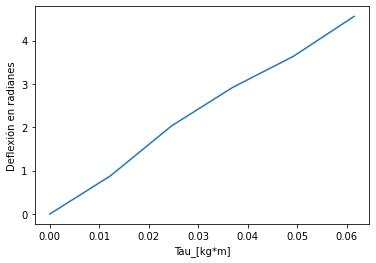

In [ ]:
x=np.array(Datos['Tau_[kg*m]']).reshape(-1,1)
y=np.array(Datos['radianes']).reshape(-1,1)

plt.plot(x,y)
plt.xlabel('Tau_[kg*m]')
plt.ylabel('Deflexión en radianes')

Hacemos la regresión lineal

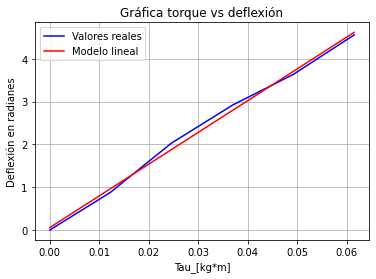

In [ ]:
reg=lm.LinearRegression()
reg.fit(x,y)

m=reg.coef_
plt.plot(x,y,color='b',label='Valores reales')
plt.title('Gráfica torque vs deflexión')
plt.plot(x,reg.predict(x),color='r',label='Modelo lineal')
plt.xlabel('Tau_[kg*m]')
plt.ylabel('Deflexión en radianes')
plt.grid()
plt.legend()
plt.savefig("Graphic")

In [ ]:
#Debido a que G está dado por Tau/Theta 1/m=G
#Además tenemos que 2G(1+nu)=Y
#Para G en una torsión sin deformaciones tenemos que G=1/2 Sigma_ij /E_ij
#Creo que más bien se refiere a este G
G=1/m
m

74.13217998904086

In [ ]:
#Promedio del error relativo
E_r=sum(abs(y[1:]-reg.predict(x)[1:])/y[1:])/len(x)
E_r

array([0.04099226])

In [ ]:
abs(y[1:]-reg.predict(x)[1:])/y[1:]

array([[0.09740282],
       [0.07410964],
       [0.04184053],
       [0.0195253 ],
       [0.01307524]])